In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt


In [2]:

# Step 1: Generate Dataset
np.random.seed(2)
k = 2
data = 60 + np.random.randint(0, 15, size=12) + (k % 5)
print("Dataset:", data)

# Step 2: Hypothesis

# H0: population mean = 65
# H1: population mean != 65
mu = 65


# Step 3: Perform One-Sample t-test

t_stat, p_value = stats.ttest_1samp(data, mu)
sample_mean = np.mean(data)
df = len(data) - 1

print(f"Sample mean: {sample_mean:.2f}")
print(f"Hypothesized mean: {mu}")
print(f"t-statistic: {t_stat:.4f}")
print(f"Degrees of freedom: {df}")
print(f"p-value: {p_value:.4f}")


Dataset: [70 75 70 68 73 64 73 70 69 64 63 73]
Sample mean: 69.33
Hypothesized mean: 65
t-statistic: 3.7888
Degrees of freedom: 11
p-value: 0.0030


In [3]:

# Step 4: 95% Confidence Interval

alpha = 0.05
ci = stats.t.interval(0.95, df, loc=sample_mean, scale=stats.sem(data))
print(f"95% Confidence Interval: {ci}")


95% Confidence Interval: (np.float64(66.81603666344222), np.float64(71.85063000322444))


Reject H0: The sample mean is significantly different from 65.


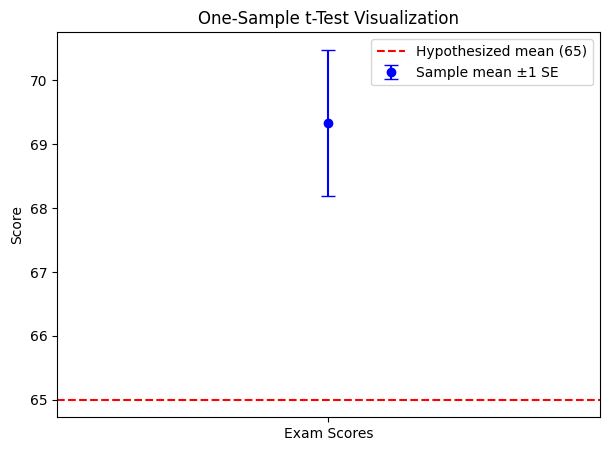

In [4]:

# Step 5: Decision

if p_value < alpha:
    print("Reject H0: The sample mean is significantly different from 65.")
else:
    print("Fail to reject H0: No significant difference from 65.")


# Step 6: Visualization

plt.figure(figsize=(7,5))
plt.errorbar(1, sample_mean, yerr=np.std(data, ddof=1)/np.sqrt(len(data)),
             fmt='o', capsize=5, label="Sample mean ±1 SE", color="blue")
plt.axhline(y=mu, color='red', linestyle='--', label="Hypothesized mean (65)")
plt.xticks([1], ["Exam Scores"])
plt.ylabel("Score")
plt.title("One-Sample t-Test Visualization")
plt.legend()
plt.show()
